In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

%matplotlib inline

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Cargamos el modelo

In [2]:
modelo = pd.read_csv('csv_files/modelo_final.csv')

In [3]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo
2143860,1112451418,bOzKYKY,2.0,2,4.0,0.0,ADMINISTRATIVO/A DE VENTAS (RUBRO AUTOMOTOR),10,3,3,Administración,1.0
171595,1112336364,kPjLJOQ,2.0,1,4.0,1.0,Feb 18 - Marketing Manager ($100K/yr) - Online...,8,4,3,Marketing,0.0
1600856,1112302327,PmadDWR,1.0,1,2.0,0.0,Recepcionista Administrativa (zona Once),10,3,3,Recepcionista,1.0
914522,1112268555,69k1oM,3.0,1,4.0,1.0,Analista Mercado de Capitales,10,3,3,Corporate Finance / Banca Inversión,0.0
861329,1112353877,0zklk6q,1.0,1,4.0,1.0,TELECOBRADORES. IMPORTANTE BANCO PRIVADO,9,2,3,Call Center,0.0


In [4]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 12 columns):
idaviso            int64
idpostulante       object
rango_edad         float64
sexo               int64
nivel_estudios     float64
esta_estudiando    float64
titulo             object
tipo_de_trabajo    int64
nivel_laboral      int64
nombre_zona        int64
nombre_area        object
sepostulo          float64
dtypes: float64(4), int64(5), object(3)
memory usage: 274.7+ MB


Nos guardamos en un dataframe alternativo todos los registros con postulaciones efectivas del postulante al aviso en cuestión. Esto será utilizado en los features que aquí abajo construiremos.

In [5]:
si = modelo['sepostulo'] == 1
modelo_si = modelo[si]

modelo_si['sepostulo'].value_counts()

1.0    1500000
Name: sepostulo, dtype: int64

### Nivel de estudios vs Nivel laboral

Nivel de estudios:
- 1 = Otro
- 2 = Secundario
- 3 = Terciario/Técnico
- 4 = Universitario
- 5 = Posgrado
- 6 = Master
- 7 = Doctorado

Nivel laboral:
- 1 = Otro
- 2 = Junior
- 3 = Senior / Semi-Senior
- 4 = Jefe / Supervisor / Responsable
- 5 = Gerencia / Alta Gerencia / Dirección

In [6]:
modelo_si['nivel_estudios'].value_counts()

4.0    760986
2.0    444447
3.0    209914
5.0     47513
6.0     28091
1.0      7154
7.0      1895
Name: nivel_estudios, dtype: int64

In [7]:
modelo_si['nivel_laboral'].value_counts()

3    978336
2    339887
1    123994
4     46387
5     11396
Name: nivel_laboral, dtype: int64

Creamos un dataframe con porcentajes por columnas. De esta forma, el heatmap nos mostrará mejor la incidencia de cada nivel de estudios para cada nivel laboral.

In [8]:
estudios_vs_laboral_t = pd.crosstab(modelo_si['nivel_laboral'], modelo_si['nivel_estudios'], normalize='columns')
estudios_vs_laboral_t

/home/towers/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


nivel_estudios,1.0,2.0,3.0,4.0,5.0,6.0,7.0
nivel_laboral,,,,,,,
1,0.123427,0.109185,0.089737,0.068507,0.049208,0.041116,0.063852
2,0.182975,0.205458,0.222439,0.246602,0.171721,0.156883,0.181003
3,0.675706,0.665861,0.659570,0.640946,0.666470,0.656865,0.654354
4,0.014957,0.016949,0.023714,0.035489,0.082251,0.096472,0.075989
5,0.002935,0.002547,0.004540,0.008455,0.030350,0.048663,0.024802


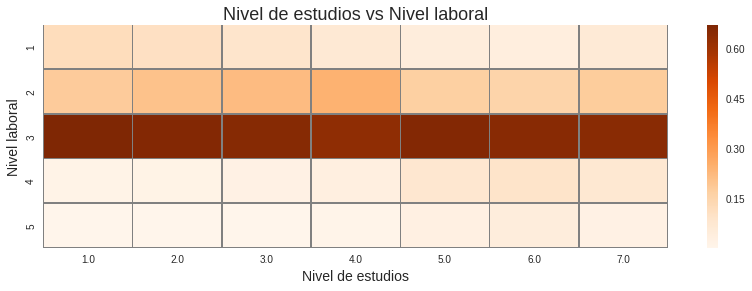

In [9]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudios_vs_laboral_t, cmap='Oranges', robust=False, annot=False,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Nivel de estudios vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel de estudios', fontsize=14)
heatmap.set_ylabel('Nivel laboral', fontsize=14)

Creamos una columna en el dataframe contenedora del peso correspondiente a la combinación de las dos variables categóricas.

In [10]:
n_estudios = 7
for index, row in estudios_vs_laboral_t.iterrows():
    for i in range(1,n_estudios+1):
        peso = row[i]
        nivel_estudios = i
        nivel_laboral = index
        relacion = (modelo['nivel_estudios'] == nivel_estudios) & (modelo['nivel_laboral'] == nivel_laboral)
        modelo.loc[(relacion), 'estudios_vs_laboral'] = peso

In [11]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,estudios_vs_laboral
1798185,1112411822,8vOD0z,3.0,2,4.0,0.0,Diseñador Gráfico Textil,10,3,3,Diseño Gráfico,1.0,0.640946
74879,1112336773,zvalARk,3.0,1,2.0,0.0,"Supervisor de produccion para SALTO, pcia de B...",10,3,3,Producción,0.0,0.665861
2308722,1112347195,bO4qNQB,1.0,1,4.0,1.0,J/ CAJEROS Y REPOSITORES - ZONA CABA,10,3,3,Atención al Cliente,1.0,0.640946
1960713,1112324289,5O512v,3.0,2,4.0,0.0,Consultor Sr. de Impuestos Corporativos,10,3,3,Impuestos,1.0,0.640946
1027840,1112347020,0zPj091,3.0,2,2.0,0.0,Ejecutivo de ventas para bodega,10,3,3,Comercial,0.0,0.665861


### Esta estudiando vs Tipo de trabajo

Esta estudiando:
- 0 = Está graduado o abandonó
- 1 = Tiene un título en curso

Tipo de trabajo:
- 1 = Voluntario
- 2 = Primer Empleo
- 3 = Fines de Semana
- 4 = Por Contrato
- 5 = Temporario
- 6 = Pasantia
- 7 = Por Horas
- 8 = Teletrabajo
- 9 = Part-time
- 10 = Full-time

In [12]:
modelo_si['esta_estudiando'].value_counts()

0.0    952095
1.0    547905
Name: esta_estudiando, dtype: int64

In [13]:
modelo_si['tipo_de_trabajo'].value_counts()

10    1270526
9      206275
6        7566
7        5035
5        3976
3        2212
4        2191
8        1595
2         557
1          67
Name: tipo_de_trabajo, dtype: int64

In [14]:
estudiando_vs_tipo_trabajo_t = pd.crosstab(modelo_si['esta_estudiando'], modelo_si['tipo_de_trabajo'], normalize='columns')
estudiando_vs_tipo_trabajo_t

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
esta_estudiando,,,,,,,,,,
0.0,0.716418,0.524237,0.663201,0.638065,0.692404,0.269759,0.709831,0.615047,0.533763,0.652831
1.0,0.283582,0.475763,0.336799,0.361935,0.307596,0.730241,0.290169,0.384953,0.466237,0.347169


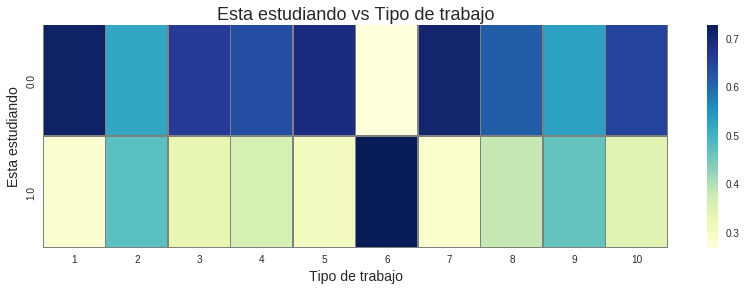

In [15]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudiando_vs_tipo_trabajo_t, cmap='YlGnBu', robust=False, annot=False,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Esta estudiando vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Esta estudiando', fontsize=14)

Creamos una columna en el dataframe contenedora del peso correspondiente a la combinación de las dos variables categóricas.

In [16]:
n_trabajos = 10
for index, row in estudiando_vs_tipo_trabajo_t.iterrows():
    for i in range(1,n_trabajos+1):
        peso = row[i]
        tipo_trabajo = i
        esta_estudiando = index
        relacion = (modelo['tipo_de_trabajo'] == tipo_trabajo) & (modelo['esta_estudiando'] == esta_estudiando)
        modelo.loc[(relacion), 'estudia_vs_tipo_trabajo'] = peso

In [17]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,estudios_vs_laboral,estudia_vs_tipo_trabajo
388572,1112269905,Yj5b66P,3.0,2,2.0,0.0,Social Media con experiencia en ventas en Merc...,10,3,3,Ventas,0.0,0.665861,0.652831
2947973,1112423441,NV9M64,3.0,1,2.0,0.0,Recepcionista Para Estudio Juridico,10,2,2,Recepcionista,1.0,0.205458,0.652831
748861,1112257059,Dr6A4L5,4.0,2,2.0,0.0,IT - Software,10,3,3,Tecnologia / Sistemas,0.0,0.665861,0.652831
1004052,1112212715,Nx45l5,2.0,1,4.0,0.0,Responsable Comercial Avellaneda,10,3,3,Comercial,0.0,0.640946,0.652831
2062006,1112305722,ekv0JXj,1.0,1,4.0,1.0,Telemarketer - Venta Telefónica - Call Center,9,2,3,Telemarketing,1.0,0.246602,0.466237


### Rango de edad vs Tipo de trabajo

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Tipo de trabajo:
- 1 = Voluntario
- 2 = Primer Empleo
- 3 = Fines de Semana
- 4 = Por Contrato
- 5 = Temporario
- 6 = Pasantia
- 7 = Por Horas
- 8 = Teletrabajo
- 9 = Part-time
- 10 = Full-time

In [18]:
modelo_si['rango_edad'].value_counts()

1.0    515062
2.0    445065
3.0    397950
4.0    141923
Name: rango_edad, dtype: int64

In [19]:
modelo_si['tipo_de_trabajo'].value_counts()

10    1270526
9      206275
6        7566
7        5035
5        3976
3        2212
4        2191
8        1595
2         557
1          67
Name: tipo_de_trabajo, dtype: int64

In [20]:
edad_vs_tipo_trabajo_t = pd.crosstab(modelo_si['rango_edad'], modelo_si['tipo_de_trabajo'], normalize='columns')
edad_vs_tipo_trabajo_t

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
rango_edad,,,,,,,,,,
1.0,0.507463,0.707361,0.464738,0.243268,0.317907,0.623976,0.361668,0.376803,0.502475,0.315631
2.0,0.298507,0.179533,0.284358,0.321771,0.311368,0.255617,0.295531,0.263950,0.258020,0.303266
3.0,0.179104,0.095153,0.199819,0.322227,0.280936,0.104282,0.257001,0.270846,0.185413,0.279301
4.0,0.014925,0.017953,0.051085,0.112734,0.089789,0.016125,0.085799,0.088401,0.054093,0.101802


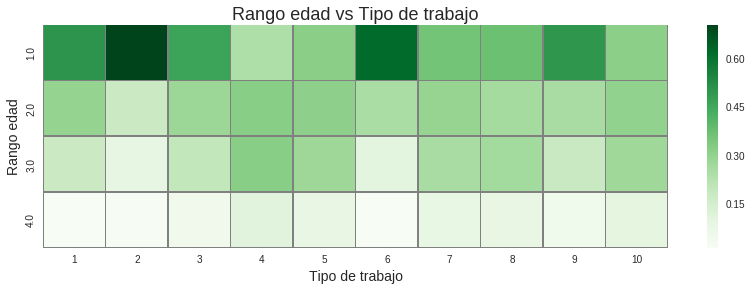

In [21]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_tipo_trabajo_t, cmap='Greens', robust=False, annot=False,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

Creamos una columna en el dataframe contenedora del peso correspondiente a la combinación de las dos variables categóricas.

In [22]:
n_trabajos = 10
for index, row in edad_vs_tipo_trabajo_t.iterrows():
    for i in range(1,n_trabajos+1):
        peso = row[i]
        tipo_trabajo = i
        rango_edad = index
        relacion = (modelo['tipo_de_trabajo'] == tipo_trabajo) & (modelo['rango_edad'] == rango_edad)
        modelo.loc[(relacion), 'edad_vs_tipo_trabajo'] = peso

In [23]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,estudios_vs_laboral,estudia_vs_tipo_trabajo,edad_vs_tipo_trabajo
1418052,1112098511,Ez0LwWb,2.0,1,6.0,1.0,Analista Sr. De Tesorería,10,3,3,Tesorería,0.0,0.656865,0.347169,0.303266
2826618,1112305373,DrXRdW5,1.0,2,2.0,1.0,Operarios de Expedición - Puesto Efectivo - Li...,10,3,3,Producción,1.0,0.665861,0.347169,0.315631
2466987,1112374115,JBrNX43,1.0,1,3.0,0.0,Operador telefónico: Área de Retención,9,2,3,Call Center,1.0,0.222439,0.533763,0.502475
2795553,1112249335,Ezl5wKN,4.0,2,3.0,0.0,Representante de Ventas Telefónicas,9,3,3,Ventas,1.0,0.659570,0.533763,0.054093
1032218,1112455129,DrXkOWd,3.0,1,3.0,1.0,RESPONSABLE DE CADENA DE SUMINISTRO,10,3,3,Logística,0.0,0.659570,0.347169,0.279301


### Rango de edad vs Nombre zona

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Nombre zona:
- 1 = Otros
- 2 = Capital Federal
- 3 = Gran Buenos Aires

In [24]:
modelo['rango_edad'].value_counts()

1.0    970076
3.0    834560
2.0    831195
4.0    364169
Name: rango_edad, dtype: int64

In [25]:
modelo['nombre_zona'].value_counts()

3    2778580
2     220523
1        897
Name: nombre_zona, dtype: int64

In [26]:
edad_vs_zona_t = pd.crosstab(modelo_si['rango_edad'], modelo_si['nombre_zona'], normalize='columns')
edad_vs_zona_t

nombre_zona,2,3
rango_edad,,
1.0,0.358279,0.342268
2.0,0.296940,0.296693
3.0,0.255237,0.266047
4.0,0.089543,0.094992


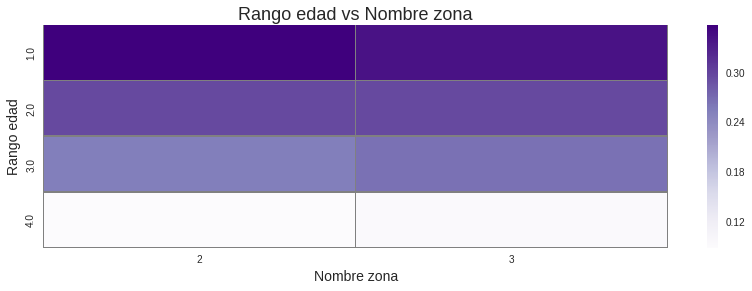

In [27]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_zona_t, cmap='Purples', robust=False, annot=False,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Nombre zona', fontsize=18)
heatmap.set_xlabel('Nombre zona', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

Creamos una columna en el dataframe contenedora del peso correspondiente a la combinación de las dos variables categóricas.

In [28]:
n_zonas = 3
for index, row in edad_vs_zona_t.iterrows():
    for i in range(2,n_zonas+1):
        peso = row[i]
        nombre_zona = i
        rango_edad = index
        relacion = (modelo['nombre_zona'] == nombre_zona) & (modelo['rango_edad'] == rango_edad)
        modelo.loc[(relacion), 'edad_vs_zona'] = peso

In [29]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,estudios_vs_laboral,estudia_vs_tipo_trabajo,edad_vs_tipo_trabajo,edad_vs_zona
943182,1112440538,5MP6pv,4.0,2,6.0,1.0,"Desarrolladores Sr, Ssr y Jr",10,3,3,Programación,0.0,0.656865,0.347169,0.101802,0.094992
2117918,1112235610,GNOXK1v,1.0,1,2.0,0.0,Secretaria Administrativa,10,3,3,Secretaria,1.0,0.665861,0.652831,0.315631,0.342268
2158799,1112306744,BmD628a,4.0,2,2.0,1.0,Empleado de limpieza/ Villa Soldati,9,2,3,Mantenimiento y Limpieza,1.0,0.205458,0.466237,0.054093,0.094992
352248,1112338869,1QPN5lb,1.0,1,3.0,1.0,Operario con libreta sanitaria vigente,10,3,3,Producción,0.0,0.659570,0.347169,0.315631,0.342268
2040211,1112303663,1ldQZb,4.0,1,4.0,0.0,Secretaria Administrativa - Villa Urquiza,10,2,3,Secretaria,1.0,0.246602,0.652831,0.101802,0.094992


In [30]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 16 columns):
idaviso                    int64
idpostulante               object
rango_edad                 float64
sexo                       int64
nivel_estudios             float64
esta_estudiando            float64
titulo                     object
tipo_de_trabajo            int64
nivel_laboral              int64
nombre_zona                int64
nombre_area                object
sepostulo                  float64
estudios_vs_laboral        float64
estudia_vs_tipo_trabajo    float64
edad_vs_tipo_trabajo       float64
edad_vs_zona               float64
dtypes: float64(8), int64(5), object(3)
memory usage: 366.2+ MB


### Relación entre las distintas áreas

La idea es encontrar relaciones fuertes entre las distintas áreas de los avisos laborales. Para esto, comenzamos por analizar las áreas a las que se postuló cada postulante.

Cabe destacar que únicamente nos interesa si el postulante se postuló o no a una cierta área: no influye la cantidad de veces que lo hizo.

In [31]:
# Eliminamos las postulaciones duplicadas de un mismo postulante a una misma área
modelo_areas = modelo_si.drop_duplicates(['idpostulante','nombre_area'])

# Creamos un diccionario del estilo {idpostulante:[areas_a_las_que_se_postulo]}
dic_id_area = {}
for index, row in modelo_si.iterrows():
    area = row['nombre_area']
    idpostulante = row['idpostulante']
    if (idpostulante not in dic_id_area):
        dic_id_area[idpostulante] = [area]
    else:
        if (area not in dic_id_area[idpostulante]):
            dic_id_area[idpostulante].append(area)

Creamos una lista de listas. Cada sublista contiene las areas a las que se postuló cada postulante. Ya no nos interesa el idpostulante, sino las areas en común.

NOTA: tomamos listas de mas de un elemento y menos de 8, ya que luego calcularemos todas las duplas
posibles para cada lista. Considerar que 7C2 = 21 duplas como máximo por lista.

In [32]:
lista_areas = []
for id in dic_id_area:
    areas = dic_id_area[id]
    if (len(areas) > 1 and len(areas) < 8):
        lista_areas.append(areas)

In [33]:
df_areas = pd.DataFrame({'areas':lista_areas})
df_areas.head(5)

,areas
0,"[Ventas, Comercial, Administración, Gastronomi..."
1,"[Atención al Cliente, Ventas, Recursos Humanos..."
2,"[Planeamiento comercial, Administración, Finan..."
3,"[Camareros, Gastronomia]"
4,"[Ventas, Comercial, Gerencia / Dirección General]"


In [34]:
df_areas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136111 entries, 0 to 136110
Data columns (total 1 columns):
areas    136111 non-null object
dtypes: object(1)
memory usage: 1.0+ MB


A continuación, calcularemos todas las duplas posibles para cada lista de áreas y las ordenaremos de mayor a menor por cantidad de apariciones. De esta forma, podremos saber cuáles son las combinaciones de áreas más comunes.

In [35]:
dic_tuplas = {}
contador = 0
for index, row in df_areas.iterrows():
    areas = sorted(row['areas'])
    for area_x in areas:
        indice = areas.index(area_x)
        for area_y in areas[indice+1:]:
            tupla = (area_x, area_y)
            if (tupla not in dic_tuplas):
                dic_tuplas[tupla] = 1
            else:
                dic_tuplas[tupla] += 1

In [36]:
df_tuplas = pd.DataFrame(list(dic_tuplas.items()), columns=['dupla_areas','cantidad'])
df_tuplas = df_tuplas.sort_values(by=['cantidad'], ascending=False).reset_index()
df_tuplas = df_tuplas[['dupla_areas', 'cantidad']]

In [37]:
df_tuplas.head(200)

,dupla_areas,cantidad
0,"(Comercial, Ventas)",20070
1,"(Atención al Cliente, Ventas)",17055
2,"(Call Center, Ventas)",11339
3,"(Administración, Ventas)",11261
4,"(Atención al Cliente, Comercial)",10376
5,"(Atención al Cliente, Call Center)",9956
6,"(Administración, Comercial)",8740
7,"(Recepcionista, Ventas)",8378
8,"(Administración, Atención al Cliente)",8011
9,"(Telemarketing, Ventas)",7994


In [38]:
df_tuplas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8845 entries, 0 to 8844
Data columns (total 2 columns):
dupla_areas    8845 non-null object
cantidad       8845 non-null int64
dtypes: int64(1), object(1)
memory usage: 138.3+ KB


In [39]:
#vemos cuales son las areas mas populares.

top_areas = ['Administración','Ventas','Producción','Call Center','Recepcionista',\
             'Contabilidad','Programación','Recursos Humanos','Gastronomia','Mantenimiento',\
             'Logística','Seguridad','Transporte','Legal','Marketing','Atención al Cliente',\
             'Tecnologia / Sistemas','Medicina','Salud']

lista_top_areas = [['Administración'],['Ventas'],['Producción'],['Call Center'],['Recepcionista'],\
             ['Contabilidad'],['Programación'],['Recursos Humanos'],['Gastronomia'],['Mantenimiento'],\
             ['Logística'],['Seguridad'],['Transporte'],['Legal'],['Marketing'],['Atención al Cliente'],\
             ['Tecnologia / Sistemas'],['Medicina'],['Salud']]

len(top_areas)
#vamos a tener 19 main areas.

19

In [40]:
df_top_areas = modelo.groupby(['nombre_area']).size().to_frame('cantidad')
df_top_areas = pd.DataFrame(df_top_areas, columns=['cantidad'])
df_top_areas = df_top_areas.sort_values('cantidad', ascending=False)

In [41]:
#VER EL PROBAR ABAJO
"""

dic_areas_agrup = {}
for area in top_areas:
     dic_areas_agrup[area] = []
#me genero un dicc de areas
        
dic_areas_agrup['Otros'] = []
#areas que no se asocian a las "top"


#voy a agregar las areas a las que le asigno una area mayor.
dic_asignados = {}

for index, row in df_tuplas.iterrows():
    
    dupla_areas = row['dupla_areas']

    area1 = dupla_areas[0]
    area2 = dupla_areas[1]
    
    if area1 not in top_areas:
        if area2 not in top_areas:
            if area1 in dic_asignados:
                if area2 in dic_asignados:
                    
                    for index_b, row_b in df_top_areas.iterrows():
                        if (dic_asignados[area1] == index_b):
                            top = dic_asignados[area1]
                            dic_areas_agrup[top].append(area1)
                            dic_asignados[area2]=top
                            break
                            
                        if (dic_asignados[area2] == index_b):
                            top = dic_asignados[area2]
                            dic_areas_agrup[top].append(area2)
                            dic_asignados[area1]=top
                            break            

                else:
                    top = dic_asignados[area1]
                    dic_areas_agrup[top].append(area1)
                    dic_asignados[area2]=top
            else:
                if area2 in dic_asignados:
                    top = dic_asignados[area2]
                    dic_areas_agrup[top].append(area2)
                    dic_asignados[area1]=top
                
                else:
                    dic_areas_agrup['Otros'].append(area1)
                    dic_areas_agrup['Otros'].append(area2)
            
            
        else:
            dic_areas_agrup[area2].append(area1)
            dic_asignados[area1]=area2
        
    else:
        if area2 not in top_areas:
            dic_areas_agrup[area1].append(area2)
            dic_asignados[area2]=area1
        else:
            dic_areas_agrup['Otros'].append(area1)
            dic_areas_agrup['Otros'].append(area2)
    
"""

'\n\ndic_areas_agrup = {}\nfor area in top_areas:\n     dic_areas_agrup[area] = []\n#me genero un dicc de areas\n        \ndic_areas_agrup[\'Otros\'] = []\n#areas que no se asocian a las "top"\n\n\n#voy a agregar las areas a las que le asigno una area mayor.\ndic_asignados = {}\n\nfor index, row in df_tuplas.iterrows():\n    \n    dupla_areas = row[\'dupla_areas\']\n\n    area1 = dupla_areas[0]\n    area2 = dupla_areas[1]\n    \n    if area1 not in top_areas:\n        if area2 not in top_areas:\n            if area1 in dic_asignados:\n                if area2 in dic_asignados:\n                    \n                    for index_b, row_b in df_top_areas.iterrows():\n                        if (dic_asignados[area1] == index_b):\n                            top = dic_asignados[area1]\n                            dic_areas_agrup[top].append(area1)\n                            dic_asignados[area2]=top\n                            break\n                            \n                       

In [42]:
#dic_areas_agrup

In [43]:
#veo mas o menos como quedaron las agrupaciones por area
#for area in top_areas:
#    print (len(dic_areas_agrup[area]))

In [44]:
top_areas

['Administración',
 'Ventas',
 'Producción',
 'Call Center',
 'Recepcionista',
 'Contabilidad',
 'Programación',
 'Recursos Humanos',
 'Gastronomia',
 'Mantenimiento',
 'Logística',
 'Seguridad',
 'Transporte',
 'Legal',
 'Marketing',
 'Atención al Cliente',
 'Tecnologia / Sistemas',
 'Medicina',
 'Salud']

In [67]:
#probar

#DONDE DICE TOP SIGNIFICA QUE ES UN AREA QUE ESTA EN TOP_AREAS

#voy a agregar las areas a las que le asigno una area mayor.
dic_asignados = {}

for index, row in df_tuplas.iterrows():
    
    dupla_areas = row['dupla_areas']

    area1 = dupla_areas[0]
    area2 = dupla_areas[1]
    
    if area1 not in top_areas:
        if area2 not in top_areas:
            
            if area1 in dic_asignados:
                if area2 in dic_asignados:
                    
                    #itero el df que esta ordenado, ver df_top_areas.
                    for index_b, row_b in df_top_areas.iterrows():
                        if (dic_asignados[area1] == index_b):
                            top = dic_asignados[area1]
                            dic_asignados[area2]=top
                            break
                            
                        if (dic_asignados[area2] == index_b):
                            top = dic_asignados[area2]
                            dic_asignados[area1]=top
                            break            

                #if area2 not in dic_asignados:
                else:
                    top = dic_asignados[area1]
                    dic_asignados[area2]=top
                    
            #if area1 not in dic_asignados:        
            else:
                if area2 in dic_asignados:
                    top = dic_asignados[area2]
                    dic_asignados[area1]=top
                
                #if area2 not in dic_asignados:
                else:
                    dic_asignados[area1] = 'Otros'
                    dic_asignados[area2] = 'Otros'
        
        #if area2 in top_areas:
        else:
            dic_asignados[area1]=area2
       
    #if area1 in top_areas:
    else:
        if area2 not in top_areas:
            dic_asignados[area2]=area1
            
        #if area2 in top_areas:
        else:
            dic_asignados[area1] = 'Otros'
            dic_asignados[area2] = 'Otros'
            



In [ ]:

i=1
for area_x in top_areas:
    
    if ((modelo['nombre_area']) not in dic_asignados):
        modelo.loc[str(modelo['nombre_area']) == area_x] = i
    
    else:
        modelo.loc[modelo['nombre_area']== dic_asignados[area_x]] = i
    
    i+=1

    
modelo.loc[(modelo['nombre_area'] == 'Otros'), 'nombre_area'] = 0

modelo.sample(4)

In [68]:
#deberia dar 188-19 = 169 (#total areas - #top areas)
len(dic_asignados)

181

In [69]:
#deberia dar todo false
for area_top in top_areas:
    print(area_top in dic_asignados)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
"""

i=1
for area_x in top_areas:
    area_actual_x = (modelo['nombre_area'] == area_x)
    modelo.loc[(area_actual_x), 'nombre_area'] = i
    for area_y in dic_areas_agrup[area_x]:
        area_actual_y = (modelo['nombre_area'] == area_y)
        modelo.loc[(area_actual_y), 'nombre_area'] = i

    i+=1
    
modelo.loc[(modelo['nombre_area'] == 'Otros'), 'nombre_area'] = 0

modelo.sample(4)

"""

In [ ]:
#reviso si quedaron areas sin asignar numero, asi arreglo la funcion de arriba(muchos ifs)

In [ ]:
modelo['nombre_area'].value_counts()

In [ ]:
modelo.info()

# HASTA ACA PROBAR

### Exportamos el modelo final con los nuevos features

In [ ]:
modelo.sample(5)

In [ ]:
modelo.info()

In [ ]:
modelo.to_csv('csv_files/modelo_final_featured.csv', encoding='utf-8', index=False)

### Exportamos los dataframes con los pesos obtenidos para los nuevos features

In [ ]:
estudios_vs_laboral_t.to_csv('csv_files/estudios_vs_laboral_t.csv', encoding='utf-8', index=True, header=True)

estudiando_vs_tipo_trabajo_t.to_csv('csv_files/estudiando_vs_tipo_trabajo_t.csv', encoding='utf-8', index=True, header=True)

edad_vs_tipo_trabajo_t.to_csv('csv_files/edad_vs_tipo_trabajo_t.csv', encoding='utf-8', index=True, header=True)

edad_vs_zona_t.to_csv('csv_files/edad_vs_zona_t.csv', encoding='utf-8', index=True, header=True)